In [1]:
import glob
import pickle

# Image and data processing
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# modeling
from keras.applications.resnet50 import ResNet50 
from keras.preprocessing import image 
from keras.applications.resnet50 import preprocess_input

# hash and similarity function
import imagehash
import skimage.measure  as ssim

Using TensorFlow backend.


In [3]:
# create the base pre-trained model
cnn_model = ResNet50(include_top=False, weights='imagenet',pooling="avg")

__Extract Features with ResNet50__

In [4]:
def image_feature_map(img_path, model):
    # https://keras.io/applications/#usage-examples-for-image-classification-models
    
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    features = cnn_model.predict(x)
    features = features.flatten()
    
    return img, features

def set_image_index(image_library_path):
    image_index = []
    for img_path in glob.glob(image_library_path):
        images_, features_ = set_image_index()
        image_index.append((images_, features_))
    
    return image_index
    

In [5]:
with open('./model_config/mcu_images_index2.pkl', 'rb') as f:
    indexes = pickle.load(f)

### Predictions for Similarity

In [123]:
def query_display_images(images):
    """
    function to plot the queried items
    """
    
    image_count = len(images)
    rows = image_count//5
    _, axs = plt.subplots(rows, 5, figsize=(25, 10))
    axs = axs.flatten()
    for img, axes in zip(images, axs):
        axes.imshow(img[0])

def ssims2(x,y):
    '''
    return similarity similarity score between pairs of feature vector
    '''
    ssimValue = ssim.compare_ssim(x,y)
    #hashes=imagehash.dhash(i)-imagehash.dhash(j)

    return ssimValue

def search_ssim_distance(query_index, indexes, topn):
    '''
    output : structural_similarity_index/euclidean_distance for top-n images
    input  : query_index, indexes, topn.
    # https://github.com/adderbyte/image_retrieval_paper_implementation/blob/master/utils.py
    '''
    
    retrieved = []

    for indx in indexes:
        search_image = indx[0]
        search_indx = indx[1]
        
        score1 = ssims2(query_index, search_indx)
        diff = query_index - search_indx 
        diff = diff**2
        score2 = sum(diff)
        match_score = score1/score2
        
        retrieved.append((search_image, match_score))
        
    sorted_retreival = sorted(retrieved, key=lambda x: x[1])
    
    selected = sorted_retreival[-topn:]
    selected = sorted(selected, key=lambda x: x[1], reverse=True)
    return selected

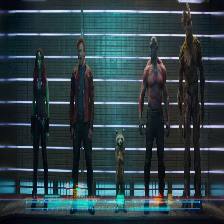

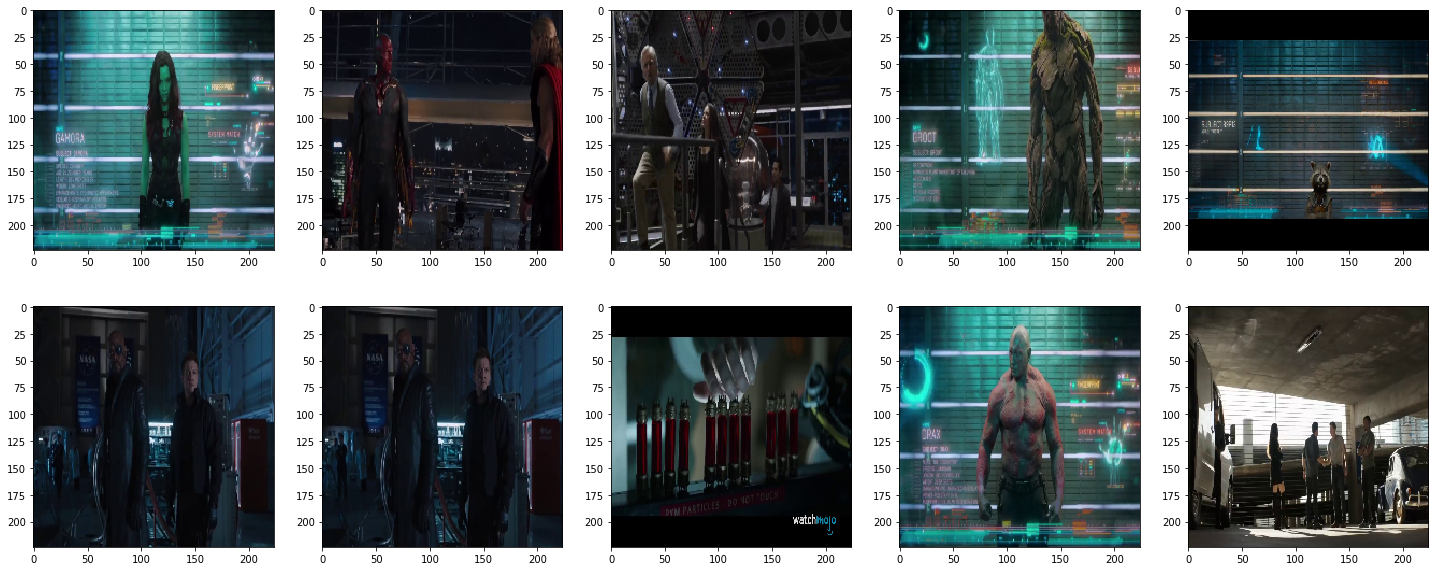

In [136]:
test_img, img_features = image_feature_map('/home/redne/git_repos/marvel_movies/images/images/guardians1_68.jpg',cnn_model)
display(test_img)
results = search_ssim_distance(img_features, indexes, 10)
query_display_images(results)

(1, 224, 224, 3)
(1, 2048)
(2048,)


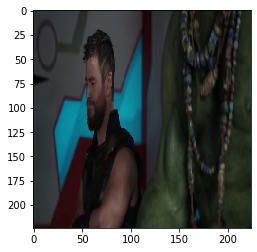

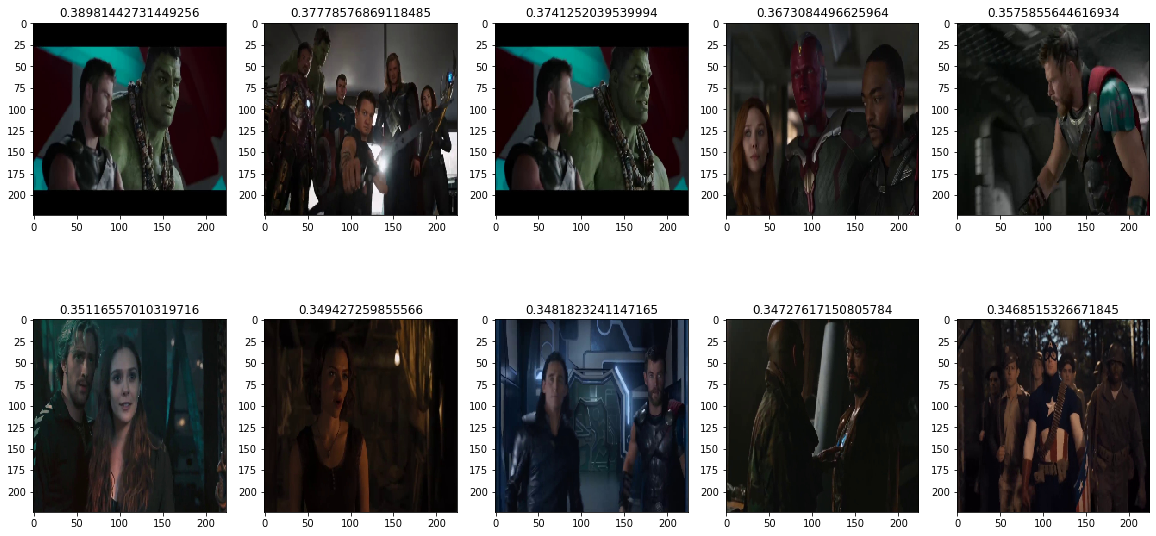

In [66]:
query_index = index_query('/home/redne/git_repos/marvel_movies/images/images/thorragnarok_71.jpg',cnn_model)
results = find_query_ssim2(query_index, indexes, 10)
plot_results(results)